Ch 10 Exercise

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

5


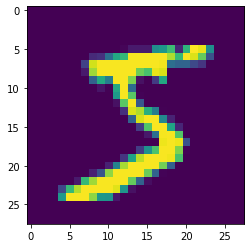

In [17]:
plt.imshow(X_train_full[0])
print(y_train_full[0])

In [18]:
X_train = X_train_full[:50000]/255
X_val = X_train_full[50000:]/255

y_train = y_train_full[:50000]
y_val = y_train_full[50000:]

In [9]:
input_ = keras.layers.Input(shape=(28, 28,1))
flatten1 = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
output = keras.layers.Dense(10, activation = "softmax")(hidden1)
model1 = keras.Model(inputs=[input_], outputs=[output])

In [7]:
keras.backend.clear_session()
np.random.seed(6)
tf.random.set_seed(6)

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2

In [10]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=["Accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val))

Epoch 1/60
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1700 - Accuracy: 0.1747 - val_loss: 2.0001 - val_Accuracy: 0.2678
Epoch 2/60
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7107 - Accuracy: 0.4388 - val_loss: 1.3187 - val_Accuracy: 0.6368
Epoch 3/60
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9889 - Accuracy: 0.7433 - val_loss: 0.6833 - val_Accuracy: 0.8294
Epoch 4/60
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6054 - Accuracy: 0.8371 - val_loss: 0.4682 - val_Accuracy: 0.8764
Epoch 5/60
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4589 - Accuracy: 0.8739 - val_loss: 0.3810 - val_Accuracy: 0.8952
Epoch 6/60
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3858 - Accuracy: 0.8919 - val_loss: 0.3292 - val_Accuracy: 0.9094
Epoch 7/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3406 - Accuracy: 0.9040 - val_loss: 0.2980 - val_Accuracy:

## Plot the loss versus epochs

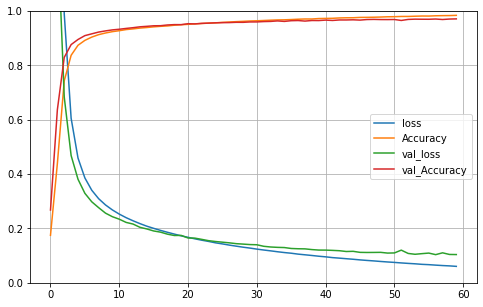

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 19.2114 - Accuracy: 0.9648


[19.21140480041504, 0.9648000001907349]

## Calculate the Precision

In [14]:


y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.94      0.96       892
           6       0.95      0.99      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



## Run the model using a learning rate scheduler.  Plot the learning rate versus the loss.  Use a learning rate that is half the LR where the loss begins increasing

In [53]:
keras.backend.clear_session()
np.random.seed(6)
tf.random.set_seed(6)

In [54]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [55]:
model1.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-5), 
              metrics=["Accuracy"])

In [56]:
def scheduler(epoch, lr):
    print(lr)
    return lr*np.exp((np.log(10E4))/500)

In [57]:
callback = keras.callbacks.LearningRateScheduler(scheduler)
history = model1.fit(X_train, y_train, epochs=500, batch_size=50000, callbacks=[callback])

Epoch 1/500
9.999999747378752e-06
1/1 [==============================] - 1s 1s/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 2/500
1.0232929525955115e-05
1/1 [==============================] - 0s 83ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 3/500
1.0471285349922255e-05
1/1 [==============================] - 0s 83ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 4/500
1.0715192729549017e-05
1/1 [==============================] - 0s 85ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 5/500
1.0964781722577754e-05
1/1 [==============================] - 0s 85ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 6/500
1.1220184205740225e-05
1/1 [==============================] - 0s 85ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 7/500
1.1481535693746991e-05
1/1 [==============================] - 0s 91ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 8/500
1.1748975339287426e-05
1/1 [==============================] - 0s 81ms/step - loss: 2.2995 - Accuracy: 0.1139
Epoch 9/500
1.2022644114040304e-05


1/1 [==============================] - 0s 80ms/step - loss: 2.2979 - Accuracy: 0.1139
Epoch 136/500
0.0002238720771856606
1/1 [==============================] - 0s 75ms/step - loss: 2.2978 - Accuracy: 0.1139
Epoch 137/500
0.0002290867269039154
1/1 [==============================] - 0s 78ms/step - loss: 2.2978 - Accuracy: 0.1139
Epoch 138/500
0.0002344228414585814
1/1 [==============================] - 0s 78ms/step - loss: 2.2977 - Accuracy: 0.1139
Epoch 139/500
0.00023988324392121285
1/1 [==============================] - 0s 81ms/step - loss: 2.2977 - Accuracy: 0.1139
Epoch 140/500
0.00024547084467485547
1/1 [==============================] - 0s 76ms/step - loss: 2.2977 - Accuracy: 0.1139
Epoch 141/500
0.0002511885832063854
1/1 [==============================] - 0s 77ms/step - loss: 2.2976 - Accuracy: 0.1139
Epoch 142/500
0.00025703952996991575
1/1 [==============================] - 0s 74ms/step - loss: 2.2976 - Accuracy: 0.1139
Epoch 143/500
0.00026302674086764455
1/1 [===============

1/1 [==============================] - 0s 74ms/step - loss: 2.2675 - Accuracy: 0.1153
Epoch 270/500
0.00489778770133853
1/1 [==============================] - 0s 81ms/step - loss: 2.2668 - Accuracy: 0.1154
Epoch 271/500
0.005011871922761202
1/1 [==============================] - 0s 78ms/step - loss: 2.2661 - Accuracy: 0.1155
Epoch 272/500
0.005128613207489252
1/1 [==============================] - 0s 75ms/step - loss: 2.2654 - Accuracy: 0.1156
Epoch 273/500
0.0052480739541351795
1/1 [==============================] - 0s 74ms/step - loss: 2.2647 - Accuracy: 0.1157
Epoch 274/500
0.005370317492634058
1/1 [==============================] - 0s 73ms/step - loss: 2.2639 - Accuracy: 0.1158
Epoch 275/500
0.005495408084243536
1/1 [==============================] - 0s 73ms/step - loss: 2.2632 - Accuracy: 0.1159
Epoch 276/500
0.005623412784188986
1/1 [==============================] - 0s 74ms/step - loss: 2.2624 - Accuracy: 0.1160
Epoch 277/500
0.005754399113357067
1/1 [===========================

1/1 [==============================] - 0s 82ms/step - loss: 2.1378 - Accuracy: 0.1964
Epoch 338/500
0.02344229444861412
1/1 [==============================] - 0s 82ms/step - loss: 2.1330 - Accuracy: 0.1981
Epoch 339/500
0.023988336324691772
1/1 [==============================] - 0s 80ms/step - loss: 2.1280 - Accuracy: 0.1998
Epoch 340/500
0.024547096341848373
1/1 [==============================] - 0s 81ms/step - loss: 2.1228 - Accuracy: 0.2019
Epoch 341/500
0.0251188725233078
1/1 [==============================] - 0s 83ms/step - loss: 2.1174 - Accuracy: 0.2041
Epoch 342/500
0.02570396661758423
1/1 [==============================] - 0s 75ms/step - loss: 2.1117 - Accuracy: 0.2063
Epoch 343/500
0.02630268968641758
1/1 [==============================] - 0s 76ms/step - loss: 2.1058 - Accuracy: 0.2084
Epoch 344/500
0.026915358379483223
1/1 [==============================] - 0s 78ms/step - loss: 2.0996 - Accuracy: 0.2109
Epoch 345/500
0.027542296797037125
1/1 [==============================] 

1/1 [==============================] - 0s 73ms/step - loss: 1.5665 - Accuracy: 0.4380
Epoch 474/500
0.5370318293571472
1/1 [==============================] - 0s 74ms/step - loss: 1.2852 - Accuracy: 0.6381
Epoch 475/500
0.5495409369468689
1/1 [==============================] - 0s 72ms/step - loss: 0.8800 - Accuracy: 0.7335
Epoch 476/500
0.5623413920402527
1/1 [==============================] - 0s 74ms/step - loss: 0.7093 - Accuracy: 0.7674
Epoch 477/500
0.575439989566803
1/1 [==============================] - 0s 72ms/step - loss: 0.7928 - Accuracy: 0.7496
Epoch 478/500
0.5888437032699585
1/1 [==============================] - 0s 73ms/step - loss: 1.1651 - Accuracy: 0.6708
Epoch 479/500
0.6025596261024475
1/1 [==============================] - 0s 68ms/step - loss: 1.3944 - Accuracy: 0.4739
Epoch 480/500
0.6165950298309326
1/1 [==============================] - 0s 65ms/step - loss: 1.5743 - Accuracy: 0.4875
Epoch 481/500
0.6309573650360107
1/1 [==============================] - 0s 64ms/st

### Fit the model with the ID'd learning rate

In [58]:
model1.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=.3), 
              metrics=["Accuracy"])

In [62]:
history = model1.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0200 - Accuracy: 0.9951 - val_loss: 0.1189 - val_Accuracy: 0.9722
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0181 - Accuracy: 0.9956 - val_loss: 0.1257 - val_Accuracy: 0.9708
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0169 - Accuracy: 0.9960 - val_loss: 0.1267 - val_Accuracy: 0.9717
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0146 - Accuracy: 0.9967 - val_loss: 0.1211 - val_Accuracy: 0.9731
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0132 - Accuracy: 0.9971 - val_loss: 0.1267 - val_Accuracy: 0.9719
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0120 - Accuracy: 0.9974 - val_loss: 0.1357 - val_Accuracy: 0.9701
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0118 - Accuracy: 0.9975 - val_loss: 0.1278 - val_Accuracy:

In [61]:
y_pred = model1.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.89      0.98      0.93      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.90      0.94       892
           6       0.98      0.97      0.98       958
           7       0.92      0.98      0.95      1028
           8       0.99      0.90      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Implement parameter search and early stopping to prevent overfitting

In [20]:
def build_model(n_hidden=1, n_neurons=30, input_shape=[28, 28]):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate=.3))
    return model

In [6]:
from sklearn.model_selection import RandomizedSearchCV

checkpoint_cb = keras.callbacks.ModelCheckpoint("MNIST_keras_model.h5")

keras_reg =keras.wrappers.scikit_learn.KerasClassifier(build_model)
#keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
#              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


param_distribs = {"n_hidden": [3,4,5,6],
                 "n_neurons": np.arange(10, 300, 10)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10), checkpoint_cb])

Epoch 1/100
4167/4167 [==============================] - 12s 3ms/step - loss: 0.5168 - val_loss: 0.2428
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2222 - val_loss: 0.1724
Epoch 3/100
4167/4167 [==============================] - 12s 3ms/step - loss: 0.1622 - val_loss: 0.1456
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1273 - val_loss: 0.1304
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1023 - val_loss: 0.1108
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0831 - val_loss: 0.1056
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0690 - val_loss: 0.1013
Epoch 8/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0576 - val_loss: 0.0909
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0468 - val_loss: 0.0916
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.4970 - val_loss: 0.2437
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2192 - val_loss: 0.1896
Epoch 3/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1577 - val_loss: 0.1400
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1222 - val_loss: 0.1313
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0971 - val_loss: 0.1202
Epoch 6/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0798 - val_loss: 0.1031
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0658 - val_loss: 0.1130
Epoch 8/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0550 - val_loss: 0.0957
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0457 - val_loss: 0.0976
Epoch 10/100
4167/4167 [==============================] - 13s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.5102 - val_loss: 0.2301
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2140 - val_loss: 0.1829
Epoch 3/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1553 - val_loss: 0.1368
Epoch 4/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1184 - val_loss: 0.1300
Epoch 5/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0953 - val_loss: 0.1334
Epoch 6/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0766 - val_loss: 0.1090
Epoch 7/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0627 - val_loss: 0.1031
Epoch 8/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0514 - val_loss: 0.0978
Epoch 9/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0416 - val_loss: 0.1033
Epoch 10/100
4167/4167 [==============================] - 14s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.5750 - val_loss: 0.2545
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2386 - val_loss: 0.2144
Epoch 3/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1775 - val_loss: 0.1592
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1420 - val_loss: 0.1371
Epoch 5/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1176 - val_loss: 0.1250
Epoch 6/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0980 - val_loss: 0.1175
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0839 - val_loss: 0.1064
Epoch 8/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0718 - val_loss: 0.1035
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0624 - val_loss: 0.1573
Epoch 10/100
4167/4167 [==============================] - 13s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.5358 - val_loss: 0.2745
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2346 - val_loss: 0.1957
Epoch 3/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1756 - val_loss: 0.1502
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1380 - val_loss: 0.1332
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1126 - val_loss: 0.1209
Epoch 6/100
4167/4167 [==============================] - 12s 3ms/step - loss: 0.0936 - val_loss: 0.1171
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0796 - val_loss: 0.1055
Epoch 8/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0682 - val_loss: 0.1119
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0562 - val_loss: 0.1031
Epoch 10/100
4167/4167 [==============================] - 13s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.5436 - val_loss: 0.2624
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2363 - val_loss: 0.1875
Epoch 3/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1761 - val_loss: 0.1887
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1387 - val_loss: 0.1335
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1136 - val_loss: 0.1426
Epoch 6/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0943 - val_loss: 0.1138
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0799 - val_loss: 0.1199
Epoch 8/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.0685 - val_loss: 0.1058
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0582 - val_loss: 0.1040
Epoch 10/100
4167/4167 [==============================] - 13s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.5657 - val_loss: 0.2579
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2360 - val_loss: 0.2012
Epoch 3/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1779 - val_loss: 0.1643
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1412 - val_loss: 0.1511
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1168 - val_loss: 0.1242
Epoch 6/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0984 - val_loss: 0.1187
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0833 - val_loss: 0.1121
Epoch 8/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0700 - val_loss: 0.1212
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0610 - val_loss: 0.1092
Epoch 10/100
4167/4167 [==============================] - 14s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.5394 - val_loss: 0.2579
Epoch 2/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.2388 - val_loss: 0.1807
Epoch 3/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1764 - val_loss: 0.1599
Epoch 4/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1392 - val_loss: 0.1461
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.1139 - val_loss: 0.1336
Epoch 6/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0959 - val_loss: 0.1160
Epoch 7/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0791 - val_loss: 0.1099
Epoch 8/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0680 - val_loss: 0.1031
Epoch 9/100
4167/4167 [==============================] - 13s 3ms/step - loss: 0.0572 - val_loss: 0.1109
Epoch 10/100
4167/4167 [==============================] - 13s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 3ms/step - loss: 0.5446 - val_loss: 0.2637
Epoch 2/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.2330 - val_loss: 0.2069
Epoch 3/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1745 - val_loss: 0.1537
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1404 - val_loss: 0.1360
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1140 - val_loss: 0.1303
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0956 - val_loss: 0.1151
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0803 - val_loss: 0.1130
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0673 - val_loss: 0.1135
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0585 - val_loss: 0.1031
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5471 - val_loss: 0.2386
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2200 - val_loss: 0.1775
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1583 - val_loss: 0.1541
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1201 - val_loss: 0.1400
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0962 - val_loss: 0.1351
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0794 - val_loss: 0.1087
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0643 - val_loss: 0.0981
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0517 - val_loss: 0.1154
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0431 - val_loss: 0.1052
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5477 - val_loss: 0.2516
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2187 - val_loss: 0.2131
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1571 - val_loss: 0.1571
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1195 - val_loss: 0.1286
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0940 - val_loss: 0.1674
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0760 - val_loss: 0.1071
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0637 - val_loss: 0.1028
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0503 - val_loss: 0.1051
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0410 - val_loss: 0.1043
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.5546 - val_loss: 0.2626
Epoch 2/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.2156 - val_loss: 0.1776
Epoch 3/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1516 - val_loss: 0.1593
Epoch 4/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1158 - val_loss: 0.1246
Epoch 5/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0926 - val_loss: 0.1180
Epoch 6/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0721 - val_loss: 0.1186
Epoch 7/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0594 - val_loss: 0.1196
Epoch 8/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0463 - val_loss: 0.0994
Epoch 9/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0370 - val_loss: 0.1087
Epoch 10/100
4167/4167 [==============================] - 17s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.6265 - val_loss: 0.2619
Epoch 2/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.2389 - val_loss: 0.1730
Epoch 3/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1731 - val_loss: 0.1777
Epoch 4/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1360 - val_loss: 0.1391
Epoch 5/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1110 - val_loss: 0.1417
Epoch 6/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0947 - val_loss: 0.1314
Epoch 7/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0774 - val_loss: 0.1438
Epoch 8/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0683 - val_loss: 0.1213
Epoch 9/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0599 - val_loss: 0.1274
Epoch 10/100
4167/4167 [==============================] - 17s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.6694 - val_loss: 0.2726
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.2309 - val_loss: 0.1883
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.1648 - val_loss: 0.1675
Epoch 4/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.1268 - val_loss: 0.1284
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.1029 - val_loss: 0.1265
Epoch 6/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0868 - val_loss: 0.1229
Epoch 7/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0730 - val_loss: 0.1144
Epoch 8/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0627 - val_loss: 0.1106
Epoch 9/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.0528 - val_loss: 0.1129
Epoch 10/100
4167/4167 [==============================] - 17s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.6265 - val_loss: 0.2364
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.2175 - val_loss: 0.1761
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.1570 - val_loss: 0.1584
Epoch 4/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.1227 - val_loss: 0.1464
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.1002 - val_loss: 0.1196
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.0843 - val_loss: 0.1261
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.0731 - val_loss: 0.1095
Epoch 8/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.0611 - val_loss: 0.1248
Epoch 9/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.0530 - val_loss: 0.1093
Epoch 10/100
4167/4167 [==============================] - 16s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5736 - val_loss: 0.2602
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2288 - val_loss: 0.1868
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1664 - val_loss: 0.1471
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1313 - val_loss: 0.1348
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1066 - val_loss: 0.1293
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0889 - val_loss: 0.1134
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0732 - val_loss: 0.1286
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0605 - val_loss: 0.1193
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0506 - val_loss: 0.1073
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.6058 - val_loss: 0.2682
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2340 - val_loss: 0.2019
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1695 - val_loss: 0.1516
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1300 - val_loss: 0.1319
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1046 - val_loss: 0.1699
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0855 - val_loss: 0.1132
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0722 - val_loss: 0.1071
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0584 - val_loss: 0.1045
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0500 - val_loss: 0.1156
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5763 - val_loss: 0.2306
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2157 - val_loss: 0.1831
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1534 - val_loss: 0.1554
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1193 - val_loss: 0.1230
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0946 - val_loss: 0.1172
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0775 - val_loss: 0.1182
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0649 - val_loss: 0.1143
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0530 - val_loss: 0.1032
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0455 - val_loss: 0.1161
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.7138 - val_loss: 0.2772
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2642 - val_loss: 0.1957
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1941 - val_loss: 0.1979
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1563 - val_loss: 0.1432
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1345 - val_loss: 0.1362
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1172 - val_loss: 0.1299
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1024 - val_loss: 0.1339
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0909 - val_loss: 0.1312
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0819 - val_loss: 0.1325
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.7002 - val_loss: 0.2973
Epoch 2/100
4167/4167 [==============================] - 15s 3ms/step - loss: 0.2671 - val_loss: 0.2439
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1979 - val_loss: 0.1788
Epoch 4/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1552 - val_loss: 0.1492
Epoch 5/100
4167/4167 [==============================] - 14s 3ms/step - loss: 0.1307 - val_loss: 0.1418
Epoch 6/100
4167/4167 [==============================] - 15s 3ms/step - loss: 0.1113 - val_loss: 0.1442
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0966 - val_loss: 0.1296
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0868 - val_loss: 0.1253
Epoch 9/100
4167/4167 [==============================] - 15s 3ms/step - loss: 0.0750 - val_loss: 0.1256
Epoch 10/100
4167/4167 [==============================] - 15s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.6187 - val_loss: 0.2777
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2513 - val_loss: 0.2413
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1872 - val_loss: 0.1604
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1523 - val_loss: 0.1592
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1281 - val_loss: 0.1555
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1101 - val_loss: 0.1523
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0955 - val_loss: 0.1269
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0859 - val_loss: 0.1281
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0761 - val_loss: 0.1217
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.6902 - val_loss: 0.2401
Epoch 2/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.2143 - val_loss: 0.1745
Epoch 3/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.1460 - val_loss: 0.1244
Epoch 4/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.1114 - val_loss: 0.1134
Epoch 5/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0870 - val_loss: 0.1263
Epoch 6/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0680 - val_loss: 0.1303
Epoch 7/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0546 - val_loss: 0.1218
Epoch 8/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0424 - val_loss: 0.1020
Epoch 9/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0365 - val_loss: 0.1022
Epoch 10/100
4167/4167 [==============================] - 18s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.6419 - val_loss: 0.2433
Epoch 2/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.1963 - val_loss: 0.1579
Epoch 3/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.1351 - val_loss: 0.1459
Epoch 4/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0973 - val_loss: 0.1294
Epoch 5/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0799 - val_loss: 0.1087
Epoch 6/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0611 - val_loss: 0.1187
Epoch 7/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0464 - val_loss: 0.1036
Epoch 8/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0393 - val_loss: 0.0989
Epoch 9/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0309 - val_loss: 0.1047
Epoch 10/100
4167/4167 [==============================] - 19s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 19s 5ms/step - loss: 0.6257 - val_loss: 0.2697
Epoch 2/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.1965 - val_loss: 0.1557
Epoch 3/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.1339 - val_loss: 0.1383
Epoch 4/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0982 - val_loss: 0.1160
Epoch 5/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0730 - val_loss: 0.1210
Epoch 6/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0601 - val_loss: 0.1225
Epoch 7/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0447 - val_loss: 0.1155
Epoch 8/100
4167/4167 [==============================] - 18s 4ms/step - loss: 0.0366 - val_loss: 0.1067
Epoch 9/100
4167/4167 [==============================] - 19s 4ms/step - loss: 0.0285 - val_loss: 0.1075
Epoch 10/100
4167/4167 [==============================] - 19s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.6223 - val_loss: 0.2665
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2353 - val_loss: 0.1981
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1697 - val_loss: 0.1500
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1330 - val_loss: 0.1459
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1077 - val_loss: 0.1226
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0872 - val_loss: 0.1120
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0748 - val_loss: 0.1134
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0626 - val_loss: 0.1100
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0526 - val_loss: 0.1104
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.6312 - val_loss: 0.2452
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2332 - val_loss: 0.1947
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1699 - val_loss: 0.1456
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1338 - val_loss: 0.1344
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1079 - val_loss: 0.1180
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0902 - val_loss: 0.1092
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0734 - val_loss: 0.1181
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0625 - val_loss: 0.1019
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0522 - val_loss: 0.1016
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5962 - val_loss: 0.2902
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2219 - val_loss: 0.1773
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1573 - val_loss: 0.1403
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1242 - val_loss: 0.1285
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1019 - val_loss: 0.1253
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0850 - val_loss: 0.1176
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0724 - val_loss: 0.1089
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0603 - val_loss: 0.1131
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0508 - val_loss: 0.1117
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5442 - val_loss: 0.2326
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2178 - val_loss: 0.1881
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1550 - val_loss: 0.1537
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1198 - val_loss: 0.1349
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0949 - val_loss: 0.1471
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0765 - val_loss: 0.1058
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0629 - val_loss: 0.0974
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0498 - val_loss: 0.0966
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0418 - val_loss: 0.1062
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5375 - val_loss: 0.2944
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2104 - val_loss: 0.1713
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1542 - val_loss: 0.1512
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1185 - val_loss: 0.1305
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0936 - val_loss: 0.1180
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0761 - val_loss: 0.1397
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0616 - val_loss: 0.1102
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0497 - val_loss: 0.1227
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0415 - val_loss: 0.1145
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.5551 - val_loss: 0.2292
Epoch 2/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.2042 - val_loss: 0.1612
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1436 - val_loss: 0.1332
Epoch 4/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.1102 - val_loss: 0.1176
Epoch 5/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0850 - val_loss: 0.1144
Epoch 6/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0682 - val_loss: 0.1055
Epoch 7/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0539 - val_loss: 0.1045
Epoch 8/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0436 - val_loss: 0.1107
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.0342 - val_loss: 0.1025
Epoch 10/100
4167/4167 [==============================] - 15s 4m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_sea

Epoch 1/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4239 - val_loss: 0.2071
Epoch 2/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.1802 - val_loss: 0.1433
Epoch 3/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.1265 - val_loss: 0.1149
Epoch 4/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0967 - val_loss: 0.1109
Epoch 5/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0755 - val_loss: 0.0928
Epoch 6/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0619 - val_loss: 0.0861
Epoch 7/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0501 - val_loss: 0.0835
Epoch 8/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0399 - val_loss: 0.0814
Epoch 9/100
6250/6250 [==============================] - 18s 3ms/step - loss: 0.0331 - val_loss: 0.0805
Epoch 10/100
6250/6250 [==============================] - 18s 3m

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021460B3B610>,
                   param_distributions={'n_hidden': [3, 4, 5, 6],
                                        'n_neurons': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])})

In [9]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model_best = rnd_search_cv.best_estimator_.model

{'n_neurons': 290, 'n_hidden': 3}
nan


In [12]:
y_pred = model_best.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
model_best.save("MNIST_MLP_best_model.h5")

In [21]:
from sklearn.model_selection import RandomizedSearchCV

checkpoint_cb = keras.callbacks.ModelCheckpoint("MNIST_keras_model_v2.h5")

keras_reg =keras.wrappers.scikit_learn.KerasClassifier(build_model)
#keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
#              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


param_distribs = {"n_hidden": [1, 2, 3, 4, 5],
                 "n_neurons": np.arange(200, 500)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=6, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10), checkpoint_cb])

print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model_best_v2 = rnd_search_cv.best_estimator_.model

y_pred = model_best_v2.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))
model_best.save("MNIST_MLP_best_model_v2.h5")

Epoch 1/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.3292 - val_loss: 0.1922
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1832 - val_loss: 0.1664
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1536 - val_loss: 0.1591
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1365 - val_loss: 0.2111
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1154 - val_loss: 0.2423
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1105 - val_loss: 0.1677
Epoch 7/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0916 - val_loss: 0.1937
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0975 - val_loss: 0.2106
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0922 - val_loss: 0.2399
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3226 - val_loss: 0.2629
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1838 - val_loss: 0.1862
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1411 - val_loss: 0.1561
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1200 - val_loss: 0.2441
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1099 - val_loss: 0.1739
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0912 - val_loss: 0.1701
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0966 - val_loss: 0.2148
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0993 - val_loss: 0.3752
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1031 - val_loss: 0.2574
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3232 - val_loss: 0.2824
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1870 - val_loss: 0.1961
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1513 - val_loss: 0.1770
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1329 - val_loss: 0.1872
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1169 - val_loss: 0.2943
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0987 - val_loss: 0.1698
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0988 - val_loss: 0.2100
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1048 - val_loss: 0.2142
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0881 - val_loss: 0.2393
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.6025 - val_loss: 0.2759
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3407 - val_loss: 0.2770
Epoch 3/100
4167/4167 [==============================] - 15s 4ms/step - loss: 0.3095 - val_loss: 0.2482
Epoch 4/100
4167/4167 [==============================] - 14s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
4167/4167 [==============================] - 13s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
E

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.5450 - val_loss: 0.3340
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3299 - val_loss: 0.2482
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 1

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.5642 - val_loss: 0.2668
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3501 - val_loss: 0.2633
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3065 - val_loss: 0.2627
Epoch 4/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3152 - val_loss: 0.3723
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 14s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 15s 4ms/step - loss: nan - val_loss:

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.3041 - val_loss: 0.1823
Epoch 2/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.1643 - val_loss: 0.1501
Epoch 3/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.1330 - val_loss: 0.1849
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1104 - val_loss: 0.1613
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0983 - val_loss: 0.1683
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0820 - val_loss: 0.1874
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0745 - val_loss: 0.1962
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0809 - val_loss: 0.2097
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0835 - val_loss: 0.2101
Epoch 10/100
4167/4167 [==============================] - 10s 3ms/

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.2999 - val_loss: 0.1598
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1617 - val_loss: 0.1960
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1319 - val_loss: 0.2616
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1082 - val_loss: 0.2047
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0990 - val_loss: 0.1643
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0845 - val_loss: 0.1724
Epoch 7/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0802 - val_loss: 0.2275
Epoch 8/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0710 - val_loss: 0.2267
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0698 - val_loss: 0.2079
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3037 - val_loss: 0.1766
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1588 - val_loss: 0.1843
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1283 - val_loss: 0.1693
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1076 - val_loss: 0.1814
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1017 - val_loss: 0.2067
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1020 - val_loss: 0.1588
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0829 - val_loss: 0.1830
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0875 - val_loss: 0.1857
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0880 - val_loss: 0.2255
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3045 - val_loss: 0.2377
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1643 - val_loss: 0.2390
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1275 - val_loss: 0.1661
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1034 - val_loss: 0.2007
Epoch 5/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0911 - val_loss: 0.1815
Epoch 6/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0823 - val_loss: 0.2041
Epoch 7/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0710 - val_loss: 0.1955
Epoch 8/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0670 - val_loss: 0.2916
Epoch 9/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0647 - val_loss: 0.2573
Epoch 10/100
4167/4167 [==============================] - 10s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3006 - val_loss: 0.1743
Epoch 2/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.1710 - val_loss: 0.2048
Epoch 3/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.1247 - val_loss: 0.1854
Epoch 4/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.1152 - val_loss: 0.1876
Epoch 5/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0970 - val_loss: 0.2113
Epoch 6/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0971 - val_loss: 0.2011
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0831 - val_loss: 0.1987
Epoch 8/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0831 - val_loss: 0.2078
Epoch 9/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0815 - val_loss: 0.2157
Epoch 10/100
4167/4167 [==============================] - 10s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.3015 - val_loss: 0.1889
Epoch 2/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.1573 - val_loss: 0.1636
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1231 - val_loss: 0.1419
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1001 - val_loss: 0.1617
Epoch 5/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0966 - val_loss: 0.1627
Epoch 6/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0824 - val_loss: 0.1866
Epoch 7/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0773 - val_loss: 0.1420
Epoch 8/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.0794 - val_loss: 0.2402
Epoch 9/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0701 - val_loss: 0.2005
Epoch 10/100
4167/4167 [==============================] - 11s 3ms/

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.3125 - val_loss: 0.1569
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1707 - val_loss: 0.2331
Epoch 3/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1289 - val_loss: 0.1522
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1123 - val_loss: 0.1605
Epoch 5/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.0953 - val_loss: 0.1860
Epoch 6/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.0890 - val_loss: 0.4265
Epoch 7/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0893 - val_loss: 0.1631
Epoch 8/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0695 - val_loss: 0.2422
Epoch 9/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0814 - val_loss: 0.2179
Epoch 10/100
4167/4167 [==============================] - 10s 3ms/

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.3060 - val_loss: 0.1866
Epoch 2/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1719 - val_loss: 0.1803
Epoch 3/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.1332 - val_loss: 0.1895
Epoch 4/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.1106 - val_loss: 0.3377
Epoch 5/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.1164 - val_loss: 0.2189
Epoch 6/100
4167/4167 [==============================] - 9s 2ms/step - loss: 0.1069 - val_loss: 0.2023
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0722 - val_loss: 0.1856
Epoch 8/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.0744 - val_loss: 0.2797
Epoch 9/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0864 - val_loss: 0.2751
Epoch 10/100
4167/4167 [==============================] - 10s 2ms/

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.2974 - val_loss: 0.2570
Epoch 2/100
4167/4167 [==============================] - 10s 3ms/step - loss: 0.1658 - val_loss: 0.1455
Epoch 3/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.1313 - val_loss: 0.2514
Epoch 4/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.1093 - val_loss: 0.1719
Epoch 5/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0913 - val_loss: 0.1558
Epoch 6/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0811 - val_loss: 0.1835
Epoch 7/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0794 - val_loss: 0.2004
Epoch 8/100
4167/4167 [==============================] - 11s 3ms/step - loss: 0.0691 - val_loss: 0.2366
Epoch 9/100
4167/4167 [==============================] - 10s 2ms/step - loss: 0.0776 - val_loss: 0.2979
Epoch 10/100
4167/4167 [==============================] - 11s 3m

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.5796 - val_loss: 0.2562
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3568 - val_loss: 0.2787
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.2933 - val_loss: 0.2522
Epoch 4/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.2840 - val_loss: 0.2589
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss:

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.6081 - val_loss: 0.3570
Epoch 2/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3394 - val_loss: 0.2564
Epoch 3/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.3234 - val_loss: 0.3592
Epoch 4/100
4167/4167 [==============================] - 16s 4ms/step - loss: 0.4387 - val_loss: 0.3906
Epoch 5/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 14s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 15s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss:

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Epoch 1/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.5910 - val_loss: 0.2670
Epoch 2/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.3424 - val_loss: 0.2781
Epoch 3/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.3109 - val_loss: 0.3160
Epoch 4/100
4167/4167 [==============================] - 17s 4ms/step - loss: 0.2907 - val_loss: 0.2534
Epoch 5/100
4167/4167 [==============================] - 17s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
4167/4167 [==============================] - 16s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
4167/4167 [==============================] - 17s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
4167/4167 [==============================] - 17s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
4167/4167 [==============================] - 17s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
4167/4167 [==============================] - 17s 4ms/step - loss: nan - val_loss:

C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\wrappers\scikit_learn.py", line 306, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_sea

Epoch 1/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.2862 - val_loss: 0.1697
Epoch 2/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1764 - val_loss: 0.1720
Epoch 3/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1591 - val_loss: 0.1651
Epoch 4/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1328 - val_loss: 0.1923
Epoch 5/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1199 - val_loss: 0.1742
Epoch 6/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1163 - val_loss: 0.2041
Epoch 7/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1114 - val_loss: 0.1881
Epoch 8/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1003 - val_loss: 0.1982
Epoch 9/100
6250/6250 [==============================] - 11s 2ms/step - loss: 0.1075 - val_loss: 0.2484
Epoch 10/100
6250/6250 [==============================] - 13s 2m